# K-means Clustering

Neste exercício, você implementará o algoritmo K-means e o usará para compactação de imagem.

* Você começará com um conjunto de dados de amostra que o ajudará a obter uma intuição de como funciona o algoritmo K-means.
* Depois disso, você usará o algoritmo K-means para compactação de imagem, reduzindo o número de cores que ocorrem em uma imagem apenas para aquelas que são mais comuns nessa imagem.




# Outline
- [ 1 - Implementando K-means](#1)
   - [1.1 Encontrando centróides mais próximos](#1.1)
     - [Exercício 1](#ex01)
   - [1.2 Computação do centróide significa](#1.2)
     - [Exercício 2](#ex02)
- [ 2 - K-means em um conjunto de dados de amostra ](#2)
- [ 3 - Inicialização aleatória](#3)
- [ 4 - Compressão de imagem com K-means](#4)
   - [ 4.1 Conjunto de dados](#4.1)
   - [4,2 K-Means em pixels de imagem](#4,2)
   - [4.3 Comprimir a imagem](#4.3)

>_**OBSERVAÇÃO:** Para evitar erros do autoavaliador, você não tem permissão para editar ou excluir células não avaliadas neste laboratório. Evite também adicionar novas células.
**Depois de ser aprovado nesta tarefa** e quiser experimentar qualquer um dos códigos não avaliados, siga as instruções na parte inferior deste caderno._

Primeiramente, execute a célula abaixo para importar os pacotes necessários nesta atribuição:

- [numpy](https://numpy.org/) é o pacote fundamental para computação científica com Python.
- [matplotlib](http://matplotlib.org) é uma biblioteca popular para plotar gráficos em Python.
- `utils.py` contém funções auxiliares para esta atribuição. Você não precisa modificar o código neste arquivo.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

<a name="1"></a>
## 1 - Implementando K-means

O algoritmo K-means é um método para agrupar automaticamente
pontos de dados juntos.

* Concretamente, você recebe um conjunto de treinamento $\{x^{(1)}, ..., x^{(m)}\}$ e deseja
para agrupar os dados em alguns “clusters” coesos.


* K-means é um procedimento iterativo que
      * Começa adivinhando os centróides iniciais e, em seguida,
      * Refine este palpite por
          * Atribuir repetidamente exemplos aos seus centróides mais próximos e, em seguida,
          * Recalculando os centróides com base nas atribuições.
         

* Em pseudocódigo, o algoritmo K-means é o seguinte:

     ``` píton
     # Inicializa centroides
     # K é o número de clusters
     centróides = kMeans_init_centroids(X, K)
    
     para iter in range(iterações):
         # Etapa de atribuição de cluster:
         # Atribua cada ponto de dados ao centróide mais próximo.
         # idx[i] corresponde ao índice do centróide
         # atribuído ao exemplo i
         idx = find_closest_centroids(X, centróides)

         # Mover passo do centróide:
         # Calcula as médias com base nas atribuições do centróide
         centróides = compute_centroids(X, idx, K)
     ```


* O loop interno do algoritmo executa repetidamente duas etapas:
     1. Atribuir cada exemplo de treinamento $x^{(i)}$ ao centroide mais próximo e
     2. Recalcular a média de cada centróide usando os pontos atribuídos a ele.
    
    
* O algoritmo $K$-means sempre convergirá para algum conjunto final de médias para os centróides.

* No entanto, a solução convergente pode nem sempre ser ideal e depende da configuração inicial dos centróides.
     * Portanto, na prática, o algoritmo K-means geralmente é executado algumas vezes com diferentes inicializações aleatórias.
     * Uma maneira de escolher entre essas diferentes soluções de diferentes inicializações aleatórias é escolher aquela com o menor valor de função de custo (distorção).

Você implementará as duas fases do algoritmo K-means separadamente
nas próximas seções.
* Você começará completando `find_closest_centroid` e, em seguida, concluirá `compute_centroids`.

<a name="1.1"></a>
### 1.1 Encontrando centróides mais próximos

Na fase de “atribuição de cluster” do algoritmo K-means, o
algoritmo atribui cada exemplo de treinamento $x^{(i)}$ ao seu mais próximo
centróide, dadas as posições atuais dos centroides.

<a name="ex01"></a>
### Exercício 1

Sua tarefa é completar o código em `find_closest_centroids`.
* Esta função pega a matriz de dados `X` e as localizações de todos
centróides dentro de 'centróides'
* Deve gerar um array unidimensional `idx` (que tem o mesmo número de elementos que `X`) que contém o índice do centróide mais próximo (um valor em $\{0,...,K-1\}$, onde $K$ é o número total de centróides) para cada exemplo de treinamento . *(Observação: o intervalo de índice de 0 a K-1 varia ligeiramente do que é mostrado nas aulas (ou seja, 1 a K) porque os índices de lista do Python começam em 0 em vez de 1)*
* Especificamente, para cada exemplo $x^{(i)}$ que definimos
$$c^{(i)} := j \quad \mathrm{que \; minimiza} \quad ||x^{(i)} - \mu_j||^2,$$
onde
  * $c^{(i)}$ é o índice do centróide que está mais próximo de $x^{(i)}$ (corresponde a `idx[i]` no código inicial), e
  * $\mu_j$ é a posição (valor) do $j$’ésimo centróide. (armazenado em `centroids` no código inicial)
  * $||x^{(i)} - \mu_j||$ é a norma L2
 
Se você tiver dúvidas, pode conferir as dicas apresentadas após a célula abaixo para ajudá-lo na implementação.

In [5]:
# UNQ_C1
# GRADED FUNCTION: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):
        distance = []
        for j in range(centroids.shape[0]):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)
        
        idx[i] = np.argmin(distance)
        
     ### END CODE HERE ###
    
    return idx

Now let's check your implementation using an example dataset

In [4]:
# Load an example dataset that we will be using
X = load_data()

The code below prints the first five elements in the variable `X` and the dimensions of the variable

In [6]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


In [7]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST
from public_tests import *

find_closest_centroids_test(find_closest_centroids)

First three elements in idx are: [0 2 1]
All tests passed!


<a name="1.2"></a>
### 1.2 Computação dos meios do centróide

Dadas as atribuições de cada ponto a um centróide, a segunda fase do
algoritmo recalcula, para cada centróide, a média dos pontos que
lhe foram atribuídos.


<a name="ex02"></a>
### Exercício 2

Por favor, complete o `compute_centroids` abaixo para recalcular o valor para cada centróide

* Especificamente, para cada centróide $\mu_k$ definimos
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$

     onde
     * $C_k$ é o conjunto de exemplos que são atribuídos ao centróide $k$
     * $|C_k|$ é o número de exemplos no conjunto $C_k$


* Concretamente, se dois exemplos dizem $x^{(3)}$ e $x^{(5)}$ são atribuídos ao centróide $k=2$,
então você deve atualizar $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

Se você tiver dúvidas, pode conferir as dicas apresentadas após a célula abaixo para ajudá-lo na implementação.

In [8]:
# UNQ_C2
# GRADED FUNCTION: compute_centroids

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    ### START CODE HERE ###
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis = 0)
        
        
    ### END CODE HERE ## 
    
    return centroids

Now check your implementation by running the cell below

In [9]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
compute_centroids_test(compute_centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
All tests passed!


<a name="2"></a>
## 2 - K-means em um conjunto de dados de amostra

Depois de ter concluído as duas funções (`find_closest_centroids`
e `compute_centroids`) acima, a próxima etapa é executar o
Algoritmo K-means em um conjunto de dados 2D de brinquedo para ajudá-lo a entender como
K-means funciona.
* Incentivamos você a dar uma olhada na função (`run_kMeans`) abaixo para entender como ela funciona.
* Observe que o código chama as duas funções que você implementou em um loop.

Ao executar o código abaixo, ele produzirá um
visualização que percorre o progresso do algoritmo em
cada iteração.
* Ao final, sua figura deve ficar parecida com a exibida na Figura 1.
* Os centróides finais são as marcas X pretas no meio dos aglomerados coloridos.
* Você pode ver como esses centróides chegaram à sua localização final observando as outras marcas X conectadas a eles.

<img src="images/figure 1.png" width="500" height="500">


**Observação**: Você não precisa implementar nada para esta parte. Basta executar o código fornecido abaixo

In [10]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


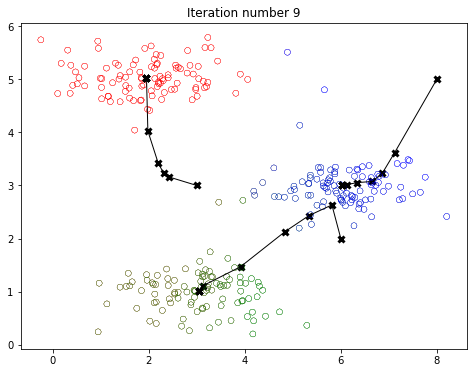

In [11]:
# Load an example dataset
X = load_data()

# Set initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="3"></a>
## 3 - Inicialização aleatória

As atribuições iniciais de centróides para o conjunto de dados de exemplo foram projetadas para que você veja a mesma figura da Figura 1. Na prática, uma boa estratégia para inicializar os centróides é selecionar exemplos aleatórios do
conjunto de treinamento.

Nesta parte do exercício, você deve entender como a função `kMeans_init_centroids` é implementada.
* O código primeiro embaralha aleatoriamente os índices dos exemplos (usando `np.random.permutation()`).
* Em seguida, seleciona os primeiros exemplos $K$ com base na permutação aleatória dos índices.
* Isso permite que os exemplos sejam selecionados aleatoriamente sem o risco de selecionar o mesmo exemplo duas vezes.

**Observação**: Você não precisa implementar nada para esta parte do exercício.

In [12]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

Você pode executar K-Means novamente, mas desta vez com centróides iniciais aleatórios. Execute a célula abaixo várias vezes e observe como diferentes clusters são criados com base nos pontos iniciais escolhidos.

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


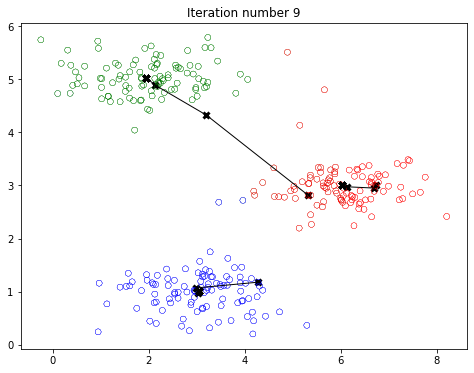

In [13]:
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


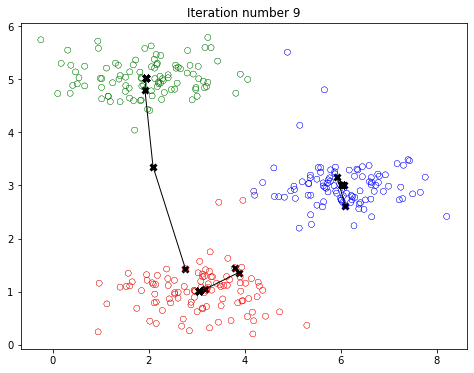

In [14]:
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


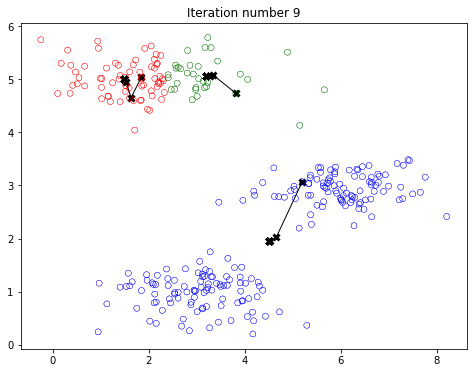

In [15]:
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

<a name="4"></a>
## 4 - Compressão de imagem com K-means

Neste exercício, você aplicará K-means à compactação de imagem.

* Em uma representação direta de cores de 24 bits de uma imagem$^{2}$, cada pixel é representado como três inteiros não assinados de 8 bits (variando de 0 a 255) que especificam os valores de intensidade de vermelho, verde e azul. Essa codificação geralmente é chamada de codificação RGB.
* Nossa imagem contém milhares de cores e, nesta parte do exercício, você reduzirá o número de
cores para 16 cores.
* Fazendo essa redução é possível representar (comprimir) a foto de forma eficiente.
* Especificamente, você só precisa armazenar os valores RGB das 16 cores selecionadas, e para cada pixel da imagem agora você precisa armazenar apenas o índice da cor naquele local (onde são necessários apenas 4 bits para representar 16 possibilidades) .

Nesta parte, você usará o algoritmo K-means para selecionar as 16 cores que serão usadas para representar a imagem compactada.
* Concretamente, você tratará cada pixel na imagem original como um exemplo de dados e usará o algoritmo K-means para encontrar as 16 cores que melhor agrupam (agrupam) os pixels no espaço RGB tridimensional.
* Depois de calcular os centróides do cluster na imagem, você usará as 16 cores para substituir os pixels na imagem original.

<img src="images/figure 2.png" width="500" height="500">

$^{2}$<sub>A foto fornecida usada neste exercício pertence a Frank Wouters e é usada com sua permissão.</sub>

<a name="4.1"></a>
### 4.1 Conjunto de dados

**Carregar imagem**

Primeiro, você usará `matplotlib` para ler na imagem original, conforme mostrado abaixo.

In [16]:
# Load an image of a bird
original_img = plt.imread('bird_small.png')

**Visualize image**

You can visualize the image that was just loaded using the code below.

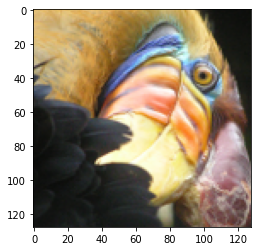

In [18]:
# Visualizing the image
plt.imshow(original_img)

**Check the dimension of the variable**

As always, you will print out the shape of your variable to get more familiar with the data.

In [19]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (128, 128, 3)


Como você pode ver, isso cria uma matriz tridimensional `original_img` onde
* os dois primeiros índices identificam uma posição de pixel, e
* o terceiro índice representa vermelho, verde ou azul.

Por exemplo, `original_img[50, 33, 2]` fornece a intensidade azul do pixel na linha 50 e na coluna 33.

#### Processando dados

Para chamar o `run_kMeans`, você precisa primeiro transformar a matriz `original_img` em uma matriz bidimensional.

* O código abaixo remodela a matriz `original_img` para criar uma matriz $m \times 3$ de cores de pixel (onde
$m=16384 = 128\times128$)

>*Observação: se você tentar este exercício mais tarde em um arquivo JPG, primeiro precisará dividir os valores de pixel por 255 para que fique no intervalo de 0 a 1. Isso não é necessário para arquivos PNG (por exemplo, `bird_small.png `) porque já está carregado no intervalo necessário (conforme mencionado na documentação [plt.imread()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html)). Nós comentamos uma linha abaixo para isso, para que você possa descomentá-la mais tarde, caso queira tentar um arquivo diferente.*

In [20]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

<a name="4.2"></a>
### 4.2 K-Means on image pixels

Now, run the cell below to run K-Means on the pre-processed image.

In [22]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16
max_iters = 10

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 576x432 with 0 Axes>

In [23]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [10  6  6 10 10]


O código abaixo irá plotar todas as cores encontradas na imagem original. Como mencionado anteriormente, a cor de cada pixel é representada por valores RGB, então o gráfico deve ter 3 eixos -- R, G e B. Você notará muitos pontos abaixo representando milhares de cores na imagem original. Os marcadores vermelhos representam os centróides após a execução do K-means. Estas serão as 16 cores que você usará para comprimir a imagem.

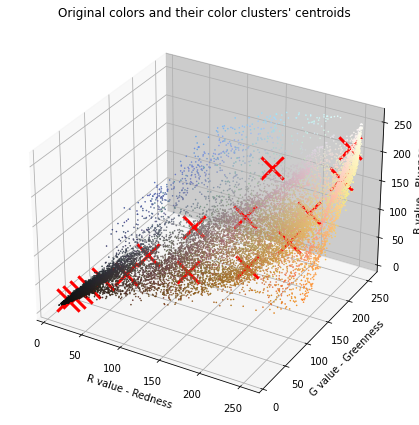

In [24]:
# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

Você pode visualizar as cores em cada um dos marcadores vermelhos (ou seja, os centróides) acima com a função abaixo. Você só verá essas cores quando gerar a nova imagem na próxima seção. O número abaixo de cada cor é seu índice e estes são os números que você vê no array `idx`.

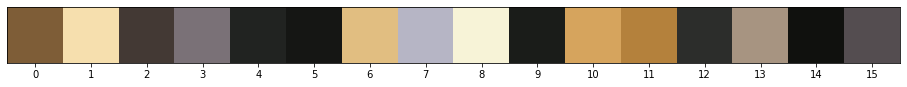

In [25]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

Depois de encontrar as principais cores $K=16$ para representar a imagem, agora você pode
atribua cada posição de pixel ao centroide mais próximo usando o
função `find_closest_centroids`.
* Isso permite que você represente a imagem original usando as atribuições do centróide de cada pixel.
* Observe que você reduziu significativamente o número de bits necessários para descrever a imagem.
     * A imagem original exigia 24 bits (ou seja, 8 bits x 3 canais na codificação RGB) para cada um dos $128\times128$ locais de pixel, resultando em um tamanho total de $128 \times 128 \times 24 = 393.216$ bits.
     * A nova representação requer algum armazenamento adicional na forma de um dicionário de 16 cores, cada uma das quais requer 24 bits, mas a própria imagem requer apenas 4 bits por localização de pixel.
     * O número final de bits usado é, portanto, $ 16 \times 24 + 128 \times 128 \times 4 = 65.920$ bits, o que corresponde a comprimir a imagem original por um fator de cerca de 6.

In [26]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

Por fim, você pode visualizar os efeitos da compactação reconstruindo
a imagem com base apenas nas atribuições do centróide.
* Especificamente, você substituiu cada pixel pelo valor do centróide atribuído a
isto.
* A Figura 3 mostra uma amostra de reconstrução. Embora a imagem resultante retenha a maioria das características do original, você também verá alguns artefatos de compactação devido ao menor número de cores usadas.

<img src="images/figure 3.png" width="700" height="700">

* Execute o código abaixo para ver como a imagem é reconstruída usando as 16 cores selecionadas anteriormente.

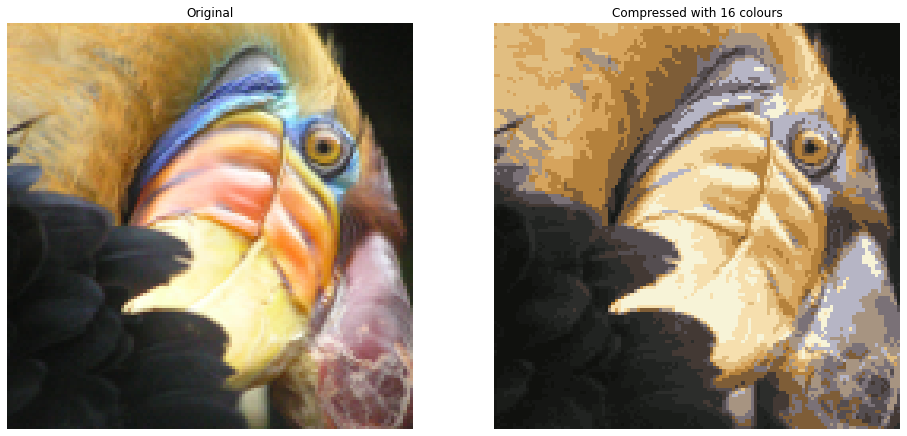

In [27]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

**Congratulations on completing this lab on K-means clustering! In the next lesson, you will learn about another use case of unsupervised learning: anomaly detection. See you there!**